# Problem statement

HELP International is an international humanitarian NGO which is committed to fight poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects along with advocacy drives to raise awareness as well as for funding purposes.

After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the dire need of aid.

As a data analyst it is necessary to categorise the countries on the basis of socio-economic and health factors and suggest to the CEO those countries which are dire need of aid.

### Reading,understanding and visualizing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
country = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country.shape

(167, 10)

In [4]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Data cleaning

#### (A) Check for Duplicate values in a dataset

In [5]:
sum(country.duplicated(subset = 'country')) == 0

True

#### (B) CHECK for NULL and NAN values in dataset

In [6]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


### Exploratory Data Analysis

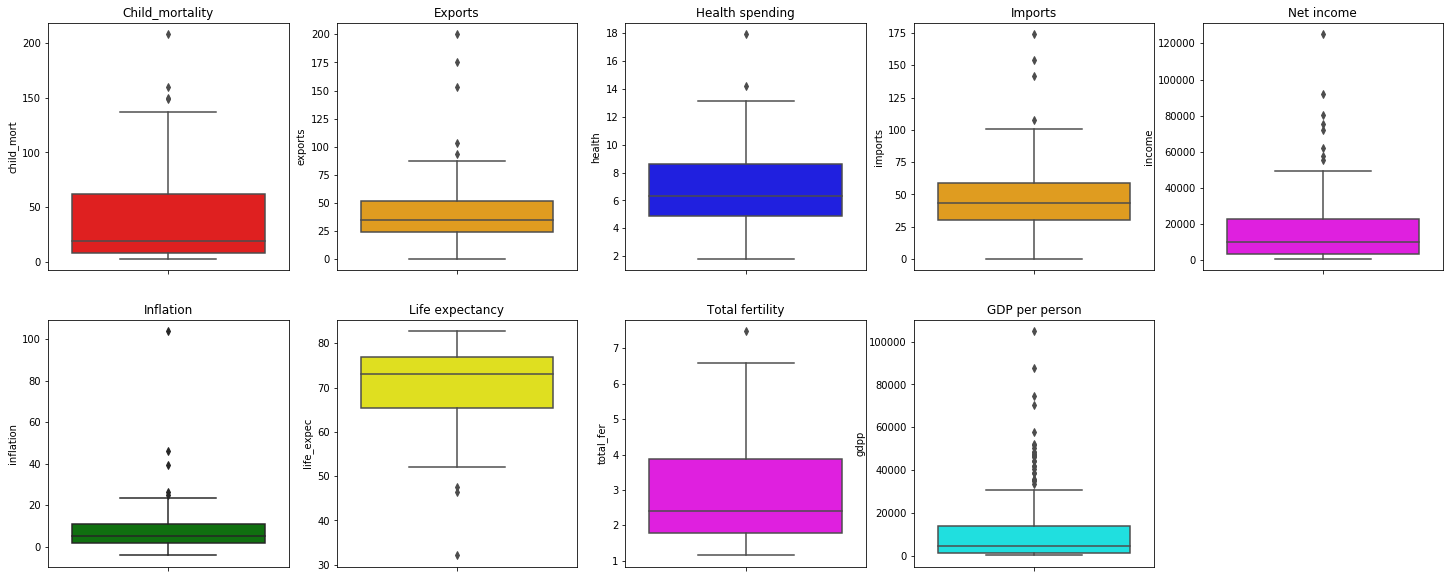

In [8]:
plt.figure(figsize=(25,10))
plt.subplot(2,5,1)
sns.boxplot(y =country.child_mort,color = 'Red')
plt.title('Child_mortality')

plt.subplot(2,5,2)
sns.boxplot(y =country.exports,color = 'Orange')
plt.title('Exports')

plt.subplot(2,5,3)
sns.boxplot(y =country.health,color = 'Blue')
plt.title('Health spending')

plt.subplot(2,5,4)
sns.boxplot(y =country.imports,color = 'orange')
plt.title('Imports')

plt.subplot(2,5,5)
sns.boxplot(y =country.income,color = 'magenta')
plt.title('Net income')

plt.subplot(2,5,6)
sns.boxplot(y =country.inflation,color = 'green')
plt.title('Inflation')

plt.subplot(2,5,7)
sns.boxplot(y =country.life_expec,color = 'yellow')
plt.title('Life expectancy')

plt.subplot(2,5,8)
sns.boxplot(y =country.total_fer,color = 'magenta')
plt.title('Total fertility')

plt.subplot(2,5,9)
sns.boxplot(y =country.gdpp,color = 'Cyan')
plt.title('GDP per person')

plt.savefig('eda')

##### As visible from above plots there are lot of outliers in the variables, so we need to remove those from our dataset

In [9]:
Q1 = country.child_mort.quantile(0.05)
Q3 = country.child_mort.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.child_mort >= Q1 - 1.5*IQR) & (country.child_mort <= Q3 + 1.5*IQR)]

Q1 = country.exports.quantile(0.05)
Q3 = country.exports.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.exports >= Q1 - 1.5*IQR) & (country.exports <= Q3 + 1.5*IQR)]

Q1 = country.health.quantile(0.05)
Q3 = country.health.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.health >= Q1 - 1.5*IQR) & (country.health <= Q3 + 1.5*IQR)]

Q1 = country.imports.quantile(0.05)
Q3 = country.imports.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.imports >= Q1 - 1.5*IQR) & (country.imports <= Q3 + 1.5*IQR)]

Q1 = country.income.quantile(0.05)
Q3 = country.income.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.income >= Q1 - 1.5*IQR) & (country.income <= Q3 + 1.5*IQR)]

Q1 = country.inflation.quantile(0.05)
Q3 = country.inflation.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.inflation >= Q1 - 1.5*IQR) & (country.inflation <= Q3 + 1.5*IQR)]

Q1 = country.life_expec.quantile(0.05)
Q3 = country.life_expec.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.life_expec >= Q1 - 1.5*IQR) & (country.life_expec <= Q3 + 1.5*IQR)]

Q1 = country.total_fer.quantile(0.05)
Q3 = country.total_fer.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.total_fer >= Q1 - 1.5*IQR) & (country.total_fer <= Q3 + 1.5*IQR)]

Q1 = country.gdpp.quantile(0.05)
Q3 = country.gdpp.quantile(0.95)
IQR = Q3 - Q1
country = country[(country.gdpp >= Q1 - 1.5*IQR) & (country.gdpp <= Q3 + 1.5*IQR)]

In [10]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,38.105488,40.107311,6.874268,46.435768,16225.079268,7.247756,70.488415,2.946646,12474.292683
std,39.896529,24.598063,2.730949,22.112332,16936.812864,7.505487,8.861355,1.502677,17722.307006
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.230000,231.000000
25%,8.425000,23.725000,4.960000,30.625000,3335.000000,1.830000,65.300000,1.797500,1310.000000
50%,19.500000,35.000000,6.400000,43.300000,9950.000000,5.265000,73.100000,2.410000,4635.000000
75%,62.050000,51.225000,8.670000,58.675000,22400.000000,10.675000,76.725000,3.865000,13500.000000
max,208.000000,175.000000,17.900000,154.000000,91700.000000,45.900000,82.800000,7.490000,105000.000000


##### Before manipulating data, we will save one copy of original data.

In [11]:
country_df = country.copy()
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
country_df = country_df.drop('country',axis='columns')

#### Apply standard scalar on the dataset

In [13]:
col = list(country_df.columns)
scaler = StandardScaler()

country_df = scaler.fit_transform(country_df)
country_df = pd.DataFrame(country_df,columns=col)
country_df.head()

C:\Users\Jitmanyu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jitmanyu\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.309740,-1.227720,0.259211,-0.069666,-0.865561,0.292980,-1.617380,1.918013,-0.674732
1,-0.540682,-0.493713,-0.119102,0.098174,-0.372819,-0.368557,0.657844,-0.865534,-0.474542
2,-0.271667,-0.069621,-0.993263,-0.682055,-0.196924,1.183049,0.680483,-0.037812,-0.453600
3,2.033818,0.904976,-1.478092,-0.160390,-0.611491,2.025005,-1.175919,2.144969,-0.506237
4,-0.699075,0.219904,-0.310095,0.565404,0.170264,-0.776171,0.714441,-0.545125,-0.015525


## Data Modeling

#### Applying PCA on the dataset

In [14]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

pca.fit(country_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [15]:
pca.components_.shape

(9, 9)

In [16]:
pca.components_

array([[-0.41707142,  0.26416786,  0.18768908,  0.13037811,  0.41046939,
        -0.19325685,  0.42525158, -0.4006349 ,  0.39605627],
       [ 0.16626965,  0.60959466, -0.14025508,  0.71387142, -0.01780182,
        -0.06583848, -0.2178763 ,  0.13068815, -0.04757916],
       [-0.17969762,  0.23818157, -0.67428713, -0.17159462,  0.1205389 ,
         0.60477777,  0.15830297, -0.11626924, -0.08947802],
       [ 0.34764414,  0.09856524,  0.19229972, -0.17589757,  0.47140389,
         0.33594745, -0.18172433,  0.38900432,  0.531111  ],
       [-0.18183315, -0.01302907,  0.60352928,  0.2518542 , -0.19656821,
         0.67595776,  0.05069234, -0.10140126, -0.17515404],
       [ 0.21153109, -0.04075914,  0.00361447, -0.05029309,  0.15419872,
         0.05496542, -0.60272783, -0.74866795,  0.02162972],
       [-0.06947963, -0.68136406, -0.28952827,  0.57355282,  0.08180463,
         0.11899188,  0.00187661,  0.01061626,  0.31170314],
       [ 0.72455736,  0.01039262, -0.0157946 ,  0.05284916, -0

In [17]:
columns = list(country_df.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':columns})
round(pcs_df)

,PC1,PC2,Feature
0,-0.0,0.0,child_mort
1,0.0,1.0,exports
2,0.0,-0.0,health
3,0.0,1.0,imports
4,0.0,-0.0,income
5,-0.0,-0.0,inflation
6,0.0,-0.0,life_expec
7,-0.0,0.0,total_fer
8,0.0,-0.0,gdpp


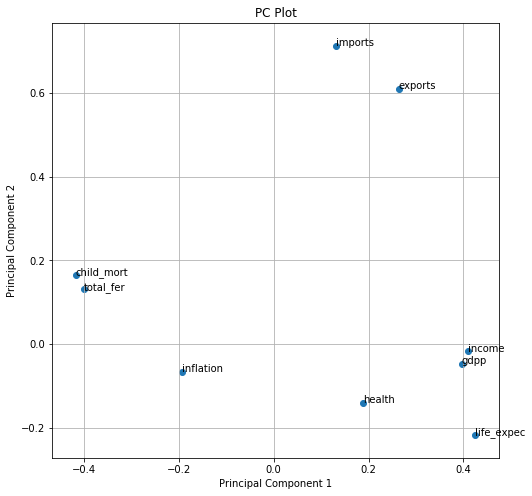

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1,pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC Plot')
plt.grid()
for i,txt in enumerate(pcs_df.Feature):
    plt.annotate(txt,(pcs_df.PC1[i],pcs_df.PC2[i]))
plt.show()
plt.savefig('pca')

In [19]:
pca.explained_variance_ratio_

array([0.46176255, 0.1699294 , 0.13516563, 0.10906535, 0.06795329,
       0.0254524 , 0.01460331, 0.00919995, 0.00686812])

#### Making the screeplot that is plotting the cumulative variance against the number of components

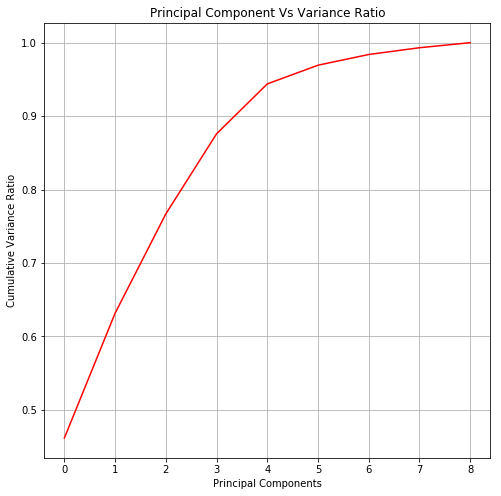

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='red')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Principal Component Vs Variance Ratio')
plt.grid()
plt.show()
plt.savefig('screeplot')

#### It looks like 4 Principal Components are enough to explain around 95% of the varience in the dataset

In [21]:
from sklearn.decomposition import IncrementalPCA
pca_new = IncrementalPCA(n_components=4)
pca_new_df = pca_new.fit_transform(country_df)
pca_new_df.shape

(164, 4)

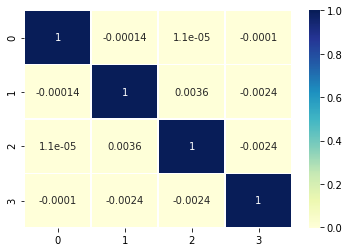

In [22]:
%matplotlib inline
corrmat = np.corrcoef(pca_new_df.T)
sns.heatmap(corrmat,annot=True,linewidths=.5,cmap='YlGnBu')
plt.savefig('corrmat')

In [23]:
cols = ['PC1','PC2','PC3','PC4']
pca_new_df = pd.DataFrame(pca_new_df,columns=cols)
pca_new_df.head()

,PC1,PC2,PC3,PC4
0,-2.965683,0.000212,1.047156,0.752562
1,0.442164,-0.511870,-0.042070,-1.284604
2,-0.364373,-0.620924,-1.674087,-0.228459
3,-3.109204,1.450742,-1.595549,1.725622
4,1.100146,0.286104,-0.032856,-0.903120


### Finding the Optimal Number of Clusters using KMeans

#### SSD method

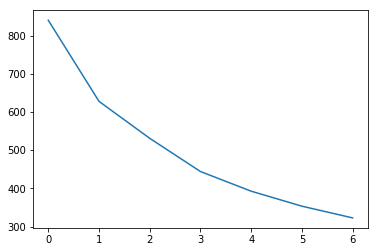

In [24]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(pca_new_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

#### Silhouette Analysis method

$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [25]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(pca_new_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(pca_new_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
 

For n_clusters=2, the silhouette score is 0.3165129082023137
For n_clusters=3, the silhouette score is 0.32454449530566293
For n_clusters=4, the silhouette score is 0.28904275064915685
For n_clusters=5, the silhouette score is 0.303967452690962
For n_clusters=6, the silhouette score is 0.3014810889049319
For n_clusters=7, the silhouette score is 0.2759813768045538
For n_clusters=8, the silhouette score is 0.29255975976826154


#### From the above data for KMeans we are going to select K=3

In [26]:
pca_new_df_k3 = KMeans(n_clusters=3,max_iter=30,random_state=42)
pca_new_df_k3.fit(pca_new_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=30,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

#### Appending our cluster_ID with the PC dataset

In [27]:
pca_new_kmean = pd.concat([pca_new_df,pd.Series(pca_new_df_k3.labels_)],axis='columns')
pca_new_kmean.columns = ['PC1','PC2','PC3','PC4','Cluster_ID']
pca_new_kmean.head()

,PC1,PC2,PC3,PC4,Cluster_ID
0,-2.965683,0.000212,1.047156,0.752562,2
1,0.442164,-0.511870,-0.042070,-1.284604,1
2,-0.364373,-0.620924,-1.674087,-0.228459,1
3,-3.109204,1.450742,-1.595549,1.725622,2
4,1.100146,0.286104,-0.032856,-0.903120,1


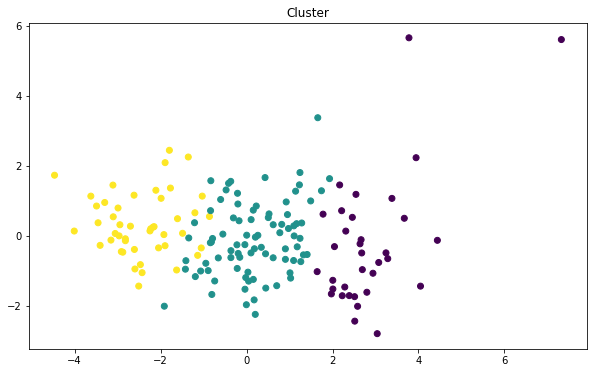

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(np.array(pca_new_kmean.PC1), np.array(pca_new_kmean.PC2),c=pca_new_kmean.Cluster_ID)
plt.title('Cluster')
plt.show()
plt.savefig('Kmeans')

### Hierarchical clustering

##### In Single Linkage method there is shortest distance between two points in a cluster

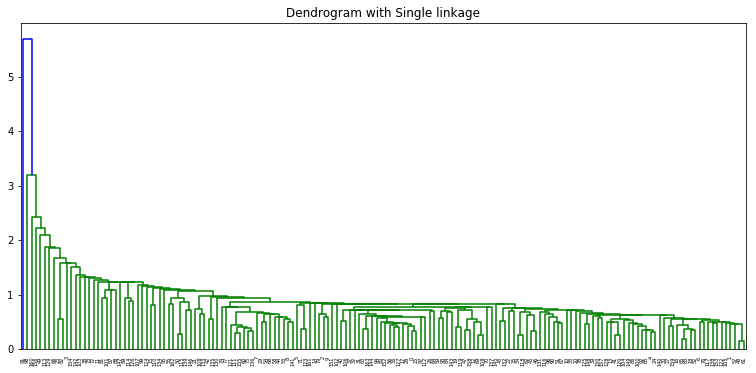

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(13,6))
pca_new_hc_single = linkage(pca_new_df,method='single',metric='euclidean')
dendrogram(pca_new_hc_single)
plt.title('Dendrogram with Single linkage')
plt.show()
plt.savefig('Single linkage')

##### In Complete linkage method there is maximum distance between two points in a cluster

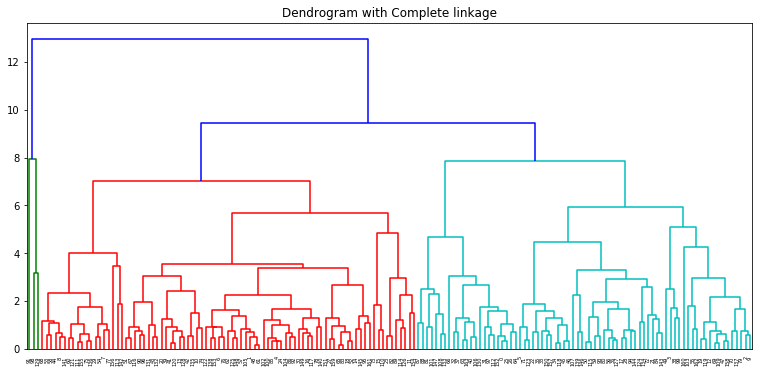

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize=(13,6))
pca_new_hc_complete = linkage(pca_new_df,method='complete',metric='euclidean')
dendrogram(pca_new_hc_complete)
plt.grid(axis='horizontal')
plt.title('Dendrogram with Complete linkage')
plt.show()
plt.savefig('complete linkage')

In [31]:
cluster_cut = pd.Series(cut_tree(pca_new_hc_complete,n_clusters=3).reshape(-1))
pca_new_hc = pd.concat([pca_new_df,cluster_cut],axis='columns')
pca_new_hc.columns = ['PC1','PC2','PC3','PC4','ClusterID']
pca_new_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.965683,0.000212,1.047156,0.752562,0
1,0.442164,-0.511870,-0.042070,-1.284604,1
2,-0.364373,-0.620924,-1.674087,-0.228459,0
3,-3.109204,1.450742,-1.595549,1.725622,0
4,1.100146,0.286104,-0.032856,-0.903120,1


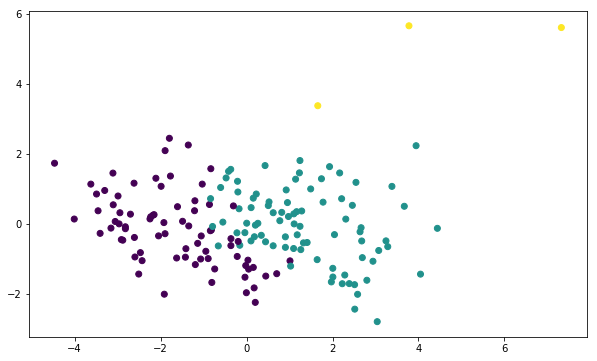

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(pca_new_hc.PC1,pca_new_hc.PC2,c = pca_new_hc.ClusterID)
plt.show()
plt.savefig('hierarchical')

##### As per scatter plots above by Kmeans and Hierarchical clustering,it is visible that classification by KMeans is better

In [33]:
pca_new_k = pd.concat([country['country'],pca_new_kmean], axis= 'columns', join='outer')
pca_new_k.head()

,country,PC1,PC2,PC3,PC4,Cluster_ID
0,Afghanistan,-2.965683,0.000212,1.047156,0.752562,2.0
1,Albania,0.442164,-0.511870,-0.042070,-1.284604,1.0
2,Algeria,-0.364373,-0.620924,-1.674087,-0.228459,1.0
3,Angola,-3.109204,1.450742,-1.595549,1.725622,2.0
4,Antigua and Barbuda,1.100146,0.286104,-0.032856,-0.903120,1.0


In [34]:
pca_new_km = pca_new_k[['country','Cluster_ID']].merge(country, on = 'country')
pca_new_km.head()

,country,Cluster_ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,2.0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1.0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1.0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,2.0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1.0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [35]:
km_clusters_child_mort = pd.DataFrame(pca_new_km.groupby(["Cluster_ID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(pca_new_km.groupby(["Cluster_ID"]).exports.mean())
km_clusters_health = pd.DataFrame(pca_new_km.groupby(["Cluster_ID"]).health.mean())
km_clusters_imports = pd.DataFrame(pca_new_km.groupby(["Cluster_ID"]).imports.mean())
km_clusters_income = pd.DataFrame(pca_new_km.groupby(["Cluster_ID"]).income.mean())
km_clusters_inflation = pd.DataFrame(pca_new_km.groupby(["Cluster_ID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(pca_new_km.groupby(["Cluster_ID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(pca_new_km.groupby(["Cluster_ID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(pca_new_km.groupby(["Cluster_ID"]).gdpp.mean())

In [36]:
df = pd.concat([pd.Series(list(range(0,3))), km_clusters_child_mort,km_clusters_exports, km_clusters_health,
                km_clusters_imports,km_clusters_income, km_clusters_inflation,
                km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ["Cluster_ID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df


,Cluster_ID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,17.521212,54.245455,8.356667,51.493939,33505.757576,4.061970,76.493939,2.232727,31060.727273
1,1,24.095122,37.765720,6.665244,44.343487,14461.341463,7.135927,72.898780,2.375488,9643.353659
2,2,76.795652,33.732826,6.242391,46.402174,7763.978261,9.124804,62.293478,4.407826,4911.847826


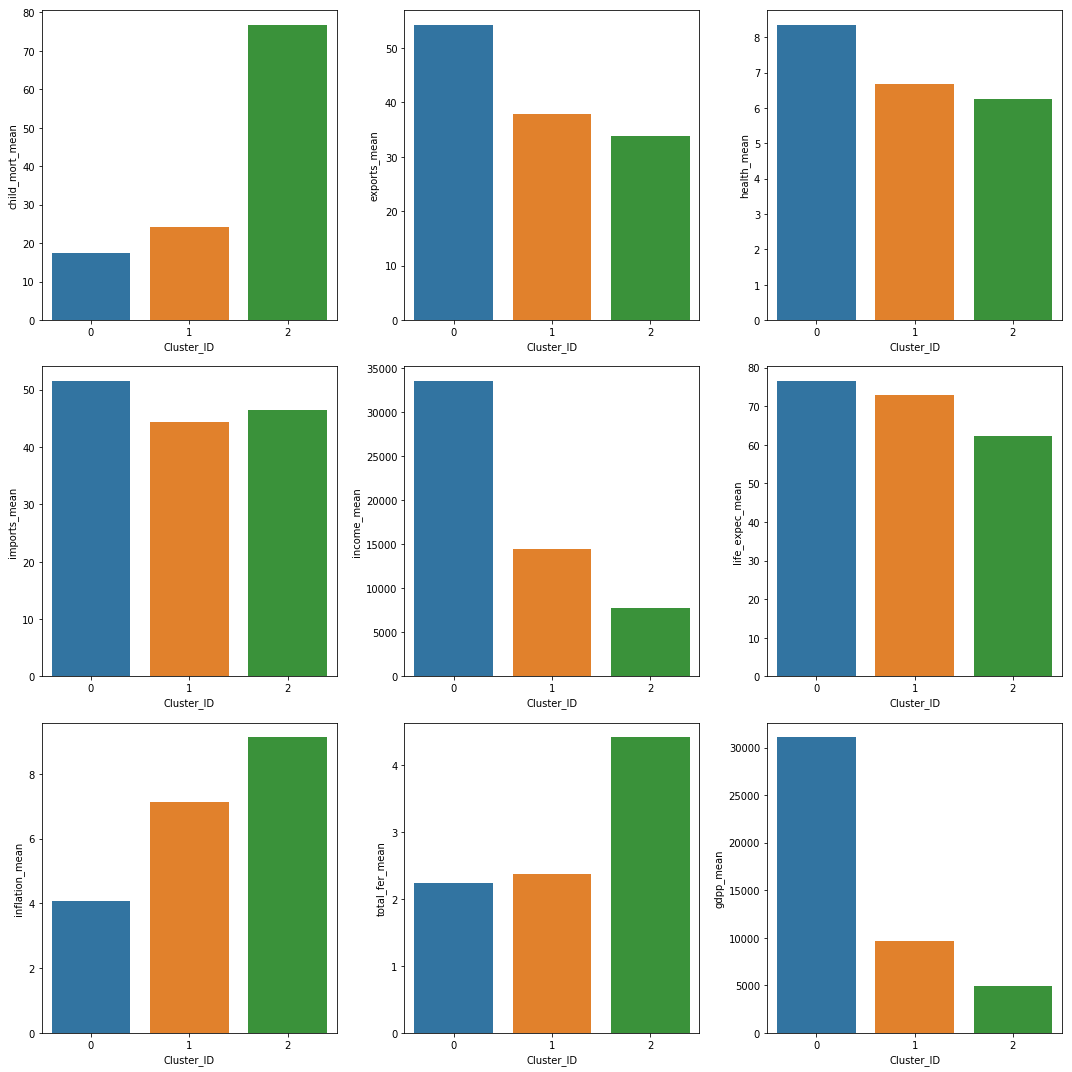

In [37]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df.Cluster_ID, y=df.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df.Cluster_ID, y=df.exports_mean, ax = axs[0,1])
sns.barplot(x=df.Cluster_ID, y=df.health_mean, ax = axs[0,2])
sns.barplot(x=df.Cluster_ID, y=df.imports_mean, ax = axs[1,0])
sns.barplot(x=df.Cluster_ID, y=df.income_mean, ax = axs[1,1])
sns.barplot(x=df.Cluster_ID, y=df.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df.Cluster_ID, y=df.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.Cluster_ID, y=df.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df.Cluster_ID, y=df.gdpp_mean, ax = axs[2,2])
plt.tight_layout()
plt.savefig('Cluster')

#### As seen from above plots Cluster 2 contains most backward countries as per social economic parameters given in the dataset

In [38]:
pca_new_km[pca_new_km.Cluster_ID == 2].country.values
#backward_countries_child_mort=country_final[country_final.ClusterID==0].sort_values(by='child_mort',ascending=False)
#country_final_gdpp = country_final[country_final.ClusterID==0].sort_values(by='gdpp').head(12)
#backward_countries_income = country_final[country_final.ClusterID==0].sort_values(by='income').head(12)

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Oman', 'Romania',
       'Samoa', 'Serbia', 'Slovak Republic', 'Spain', 'Sweden',
       'Tajikistan', 'Tanzania', 'Tunisia', 'Vanuatu', 'Venezuela'],
      dtype=object)

### Recommendation

##### The countries mentioned below are the most backward countries as per socio economic parameters.Hence it is recommended that these countries are in dire need of aid from HELP NGO fund of 10 million.

Afghanistan
Angola
Benin
Botswana
Burkina Faso
Burundi
Cameroon
Central African Republic
Chad
Comoros
Congo Dem. Rep.
Congo, Rep
Cote d'Ivoire
Equatorial Guinea
Eritrea
Gabon
Gambia
Ghana
Guinea
Guinea-Bissau
Haiti
Iraq
Kenya
Kiribati
Lao
Lesotho
Liberia
Madagascar
Malawi
Mali
Mauritania
Mozambique
Namibia
Niger
Oman
Romania
Samoa
Serbia
Slovak Republic
Spain
Sweden
Tajikistan
Tanzania
Tunisia
Vanuatu
Venezuela